In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [5]:
df = pd.read_csv("/content/spam.csv", encoding = 'latin1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)

In [9]:
df.columns = ['Category', 'Message']

In [10]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: ylabel='count'>

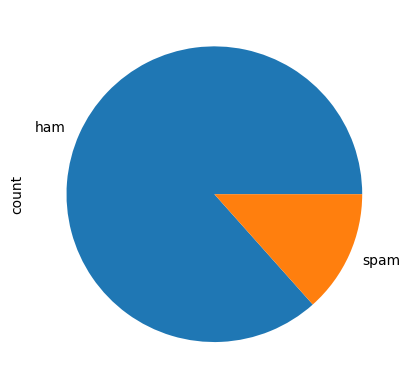

In [13]:
df['Category'].value_counts().plot(kind='pie')

In [14]:
df['Spam'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [15]:
df.columns

Index(['Category', 'Message', 'Spam'], dtype='object')

In [16]:
df.head(10)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [19]:
x = np.array(df["Message"])
y = np.array(df["Spam"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [21]:
# 1==Spam
# 0==Ham
sample = input('Enter a Messege:')
df = cv.transform([sample]).toarray()
print(clf.predict(df))

Enter a Messege:Even my brother is not like to speak with me. 
[0]


In [22]:
clf.score(X_test,y_test)

0.9784688995215312